In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Churn_Modelling.csv")
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# h0 - não há diferença de salário entre H/M
# ha - há diferença

In [ ]:
# teste de levene p/ homocedasticidade
# h0 - variancia entre grupos é igual
# ha - variancia entre grupos não é igual

In [ ]:
scipy.stats.levene(df[df['Gender'] == 'Female']['EstimatedSalary'],
                   df[df['Gender'] == 'Male']['EstimatedSalary'], center = 'mean')

LeveneResult(statistic=0.5138439988784133, pvalue=0.473496281028016)

In [ ]:
# p-value maior que o nível de significancia a = 0.05
# não rejeitamos a hip nula, ié, variancia entre grupos é igual

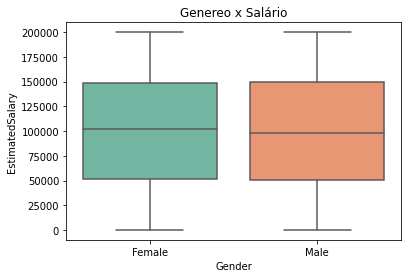

In [ ]:
plt.title('Genero x Salário')
sns.set(style = "darkgrid")
sns.boxplot(x = 'Gender', 
            y = 'EstimatedSalary',
            data = df,
            palette = "Set2")
plt.show()

In [ ]:
# análise de variancia ANOVA em grupos de idades
# criando grupos de idade
df.loc[(df['Age'] <= 30), 'new_age'] = 'menores que 30 anos'
df.loc[(df['Age'] > 30) & (df['Age'] < 80), 'new_age'] = 'entre 30 e 80 anos'
df.loc[(df['Age'] >= 80), 'new_age'] = 'menores que 80 anos'

In [ ]:
# h0 - nenhum grupo de idade difere pelo valor do saldo
# ha - pelo menos 1 grupo de idade difere pelo valor do saldo

In [ ]:
grupo1 = df[df['new_age'] == 'menores que 30 anos']['Balance']
grupo2 = df[df['new_age'] == 'entre 30 e 80 anos']['Balance']
grupo3 = df[df['new_age'] == 'menores que 80 anos']['Balance']

In [ ]:
anova = scipy.stats.f_oneway(grupo1, grupo2, grupo3)
anova

F_onewayResult(statistic=5.433028234221274, pvalue=0.004382755220115327)

In [ ]:
# p-value menor que a significancia a = 0.05, rejeitamos h0

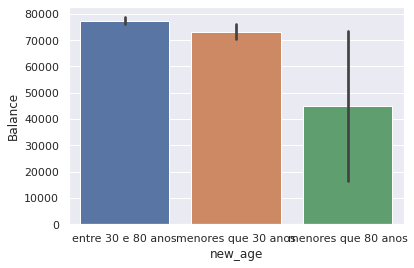

In [ ]:
sns.barplot(x = 'new_age',
            y = 'Balance',
            data = df)
plt.show()